### Student details

Student name: Aryank Gupta

Student ID: 24101613

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [6]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [7]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [8]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

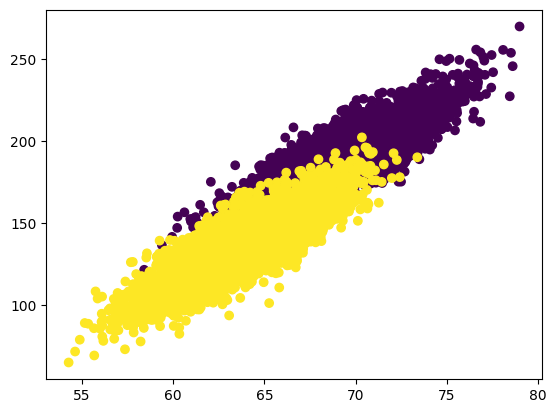

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split

In [10]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

In [11]:

perceptron = Perceptron(eta=0.1, epochs=50) #eta is learning rate

perceptron.train(X_train, y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [12]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(X_test)
accuracy_score(y_test, y_pred)

0.8545454545454545

### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

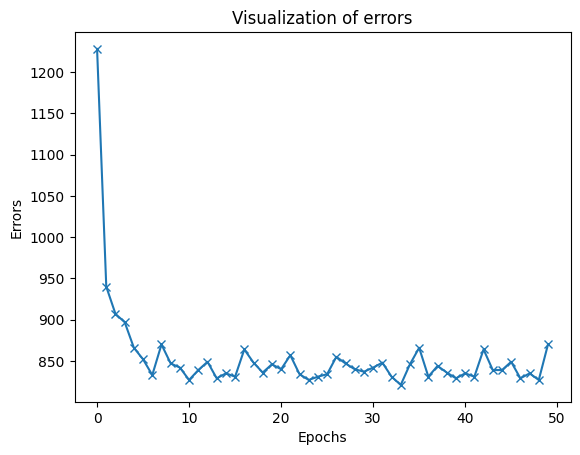

In [13]:
from matplotlib import pyplot as plt

plt.title('Visualization of errors')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.plot(perceptron.errors_, marker='x')
plt.show()

#Problem statement:
Using many random inputs (e.g. 5000), plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use Matplotlib

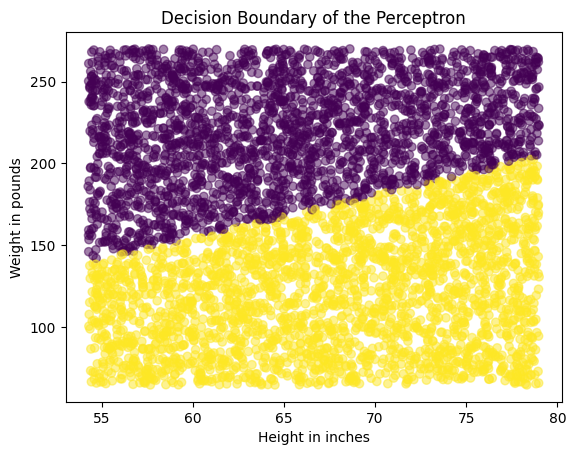

In [15]:
import matplotlib.pyplot as plt

import numpy as np

num_inputs = 5000
x1_random = np.random.uniform(X[:, 0].min(), X[:, 0].max(), num_inputs)
x2_random = np.random.uniform(X[:, 1].min(), X[:, 1].max(), num_inputs)
X_random = np.column_stack((x1_random, x2_random))

y_random_pred = perceptron.predict(X_random)

plt.scatter(X_random[:, 0], X_random[:, 1], c=y_random_pred, alpha=0.5)

plt.xlabel('Height in inches')
plt.ylabel('Weight in pounds')
plt.title('Decision Boundary of the Perceptron')
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


# Answer 1

As training progresses, the Perceptron model iteratively updates its weights based on the errors it makes in predicting the output for the given data. In each epoch, the model passes through the entire dataset, computes predictions, and compares them to the actual labels. If a prediction is incorrect, the model adjusts its weights to reduce the error. This process repeats for a number of epochs, aiming to minimize the overall error by adjusting the decision boundary between the classes. The error typically decreases with each epoch, although it may plateau or oscillate if the model struggles to find a clear decision boundary for complex data.



#Answer 2

We do not always arrive at the best solution in the final epoch. Sometimes, the lowest error may be reached at an earlier epoch before the error starts increasing again. This is because the Perceptron might overfit the training data or oscillate in its weight updates, especially if the data is not perfectly linearly separable. In cases of overfitting, the model starts to fit to noise or outliers in the data, which can increase the error after some point, even if it was lower in a previous epoch. Monitoring the error at each epoch helps identify when the model performs best, which may occur before the last epoch.

#Answer 3

Zero error cannot always be achieved if the data is not perfectly linearly separable. The Perceptron algorithm works well when the data can be separated by a straight line, but if there is overlap between classes or if there are outliers, it is impossible for the model to classify all points correctly. In such cases, there will always be some error, as the model cannot find a hyperplane that divides the data perfectly. Additionally, noise in the data can also prevent the Perceptron from achieving zero error.